In [37]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Explore SleepAnalysisinterval data file

In [3]:
sleep202003 = pd.read_csv("//umms-HDS629-win.turbo.storage.umich.edu/umms-HDS629/MIPACT/HealthKit_Live/HealthKit_SleepAnalysisinterval/SleepAnalysisinterval_202003.csv")

In [4]:
sleep202003.head()

,ParticipantResearchID,Device,HealthKitType,StartDate,Date,Value,Units,SourceIdentifier,SourceVersion,DeviceModel,DeviceManufacturer,DeviceHardwareVersion,DeviceSoftwareVersion
0,5833,NaN,SleepAnalysisInterval,2020-03-14,2020-03-14,InBed,NaN,io.bodymatter.SleepWatch,6.2.1.0,NaN,NaN,NaN,NaN
1,5833,NaN,SleepAnalysisInterval,2020-03-14,2020-03-14,InBed,NaN,io.bodymatter.SleepWatch,6.2.1.0,NaN,NaN,NaN,NaN
2,5833,NaN,SleepAnalysisInterval,2020-03-12,2020-03-12,InBed,NaN,io.bodymatter.SleepWatch,6.2.1.0,NaN,NaN,NaN,NaN
3,5833,NaN,SleepAnalysisInterval,2020-03-15,2020-03-15,InBed,NaN,io.bodymatter.SleepWatch,6.2.1.0,NaN,NaN,NaN,NaN
4,5833,NaN,SleepAnalysisInterval,2020-03-15,2020-03-15,InBed,NaN,io.bodymatter.SleepWatch,6.2.1.0,NaN,NaN,NaN,NaN


### 2. Explore survey data

In [98]:
# survey202003 = pd.read_csv("//umms-HDS629-win.turbo.storage.umich.edu/umms-HDS629/MIPACT/HealthKit_Live/Surveys/Surveys_202003.csv", engine = "python")
survey202003 = pd.read_csv("/Users/wenjzh/githubproject/Health-Big-Data/data/Surveys/Surveys_202003.csv", engine = "python")

In [99]:
survey202003.head()

,ParticipantResearchID,SurveyKey,SurveyName,SurveyVersion,ResultIdentifier,SurveyStepType,SurveyTaskStatus,SurveyStartDate,SurveyEndDate,SurveyDueDate,SurveyQuestionStartDate,SurveyQuestionEndDate,SurveyQuestion,SurveyAnswer
0,2558,641C66A6-EC7A-E811-8164-98C946646B24,World Health Organization Disability Assessmen...,7,S12,QuestionStep,Complete,2020-03-04,2020-03-04,2020-03-05,2020-03-04,2020-03-04,"In the past 30 days, how much difficulty did y...",1
1,1825,8EC4F74D-DE85-E811-8164-98C946646B24,Sleep Disturbance - Every 4th Quarter,6,S11,QuestionStep,Complete,2020-03-08,2020-03-08,2020-03-09,2020-03-08,2020-03-08,Do you snore loudly (louder than talking or lo...,False
2,1750,825A8E24-D685-E811-8164-98C946646B24,Patient Health Questionnaire - Quarterly,3,Q2,QuestionStep,Complete,2020-03-01,2020-03-01,2020-02-29,2020-03-01,2020-03-01,"Over the last 2 weeks, how often have you been...",0
3,6461,D565D787-739A-E811-8166-F4DD8A83AAAC,Weekly Blood Pressure,5,MOOD,FormStep,Complete,2020-03-26,2020-03-26,2020-04-01,2020-03-26,2020-03-26,Current Mood,9
4,4599,890B3FF8-DE90-E811-8166-F4DD8A83AAAC,TAPS+ - Quarterly FEMALE,5,T0.5,QuestionStep,Complete,2020-03-02,2020-03-02,2020-03-03,2020-03-02,2020-03-02,"Have you changed your smoking, drinking, drug ...",False


In [100]:
survey202003.SurveyName.unique()

array(['World Health Organization Disability Assessment Scale 2.0 - Biannually',
       'Sleep Disturbance - Every 4th Quarter',
       'Patient Health Questionnaire - Quarterly',
       'Weekly Blood Pressure', 'TAPS+  - Quarterly FEMALE',
       'Pain - Quarterly', 'Mobility - Annually',
       'Life Stress - Biannually', 'Sleep Disturbance - Quarterly',
       'Over-the-counter Medications',
       'Generalized Anxiety Disorder - Quarterly',
       'Weekly Blood Pressure + Menstruation Questions',
       'TAPS+ - Annually MALE',
       'NIH PROMIS Cognitive Function 4a - Quarterly',
       "Women's Health - Quarterly", 'Mobility - Quarterly',
       'TAPS+ - Annually FEMALE', 'Food - Quarterly', 'Food - Annually',
       'eFHS - Cardiovascular History - Intake and Quarterly',
       'TAPS+ - Quarterly MALE',
       'eFHS - Medical History: Medications - Quarterly',
       'eFHS - Non-Cardiovascular Diagnoses - Intake and Quarterly'],
      dtype=object)

In [8]:
survey202003.SurveyName.unique().size

23

In [101]:
sleep_survey202003 = survey202003.loc[survey202003['SurveyName'].isin(['Sleep Disturbance - Every 4th Quarter', 
                                                                      'Life Stress - Biannually',
                                                                     'Sleep Disturbance - Quarterly',
                                                                     'Generalized Anxiety Disorder - Quarterly'])]

In [10]:
# Choose survey
sleep_survey202003 = survey202003.loc[survey202003['SurveyName'].isin(['Sleep Disturbance - Quarterly'])]

In [102]:
# Extract information
sleep_survey202003 = sleep_survey202003[['ParticipantResearchID', 
                                         'SurveyName', 
                                         'SurveyStartDate', 
                                         'SurveyQuestion', 
                                         'SurveyAnswer']]

In [103]:
sleep_survey202003.head(20)

,ParticipantResearchID,SurveyName,SurveyStartDate,SurveyQuestion,SurveyAnswer
1,1825,Sleep Disturbance - Every 4th Quarter,2020-03-08,Do you snore loudly (louder than talking or lo...,False
7,3603,Life Stress - Biannually,2020-03-26,"In the last month, how often have you felt tha...",1
8,4196,Sleep Disturbance - Quarterly,2020-03-21,In the past 7 days:My sleep was refreshing.,1
9,5463,Sleep Disturbance - Quarterly,2020-03-24,In the past 7 days:My sleep was refreshing.,2
16,3565,Generalized Anxiety Disorder - Quarterly,2020-03-26,"Over the last 2 weeks, how often have you been...",1
17,3837,Generalized Anxiety Disorder - Quarterly,2020-03-18,"Over the last 2 weeks, how often have you been...",0
23,1159,Generalized Anxiety Disorder - Quarterly,2020-03-24,How difficult have these made it for you to do...,1
24,1847,Life Stress - Biannually,2020-03-14,"In the last month, how often have you felt dif...",1
30,5011,Sleep Disturbance - Quarterly,2020-03-26,In the past 7 days:My sleep was refreshing.,2
34,1933,Sleep Disturbance - Quarterly,2020-03-14,In the past 7 days:I had difficulty falling as...,1


In [104]:
# See all the questions
sleep_survey202003.SurveyQuestion.unique()

array(['Do you snore loudly (louder than talking or loud enough to be heard through closed doors)?',
       'In the last month, how often have you felt that things were going your way?',
       'In the past 7 days:My sleep was refreshing.',
       'Over the last 2 weeks, how often have you been bothered by the following problems?Worrying too much about different things',
       'Over the last 2 weeks, how often have you been bothered by the following problems?Feeling nervous, anxious, or on edge',
       'How difficult have these made it for you to do your work, take care of things at home, or get along with other people?',
       'In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?',
       'In the past 7 days:I had difficulty falling asleep.',
       'In the past 7 days:My sleep quality was',
       'In the last month, how often have you felt confident about your ability to handle your personal problems?',
       'Over the 

In [97]:
# See the possible answers to the question
sleep_survey202003[sleep_survey202003.SurveyQuestion == 'In the past 7 days:I had a problem with my sleep.'].SurveyAnswer.unique()

array(['2', '1', '3', '4', '5'], dtype=object)

In [15]:
# Extract answer
sleep_quality_202003 = sleep_survey202003[sleep_survey202003.SurveyQuestion == 'In the past 7 days:My sleep quality was'].SurveyAnswer
sleep_quality_202003 = pd.to_numeric(sleep_quality_202003)

In [45]:
# Calculate average
sleep_quality_202003.mean()

2.5179437439379244

In [78]:
# Calculate standard error
stats.sem(sleep_quality_202003, nan_policy = 'omit')

0.035215913437657446

### 3. Summary: steps to collect and visualize answers

In [83]:
for time in time_array:
    file = '/Users/wenjzh/githubproject/Health-Big-Data/data/Surveys/Surveys_' + time + '.csv'
    survey = pd.read_csv(file, engine = "python")
    sleep_survey = survey.loc[survey['SurveyName'].isin(['Sleep Disturbance - Quarterly'])]
    sleep_survey = sleep_survey[['ParticipantResearchID', 
                                         'SurveyName', 
                                         'SurveyStartDate', 
                                         'SurveyQuestion', 
                                         'SurveyAnswer']]
    sleep_quality = sleep_survey[sleep_survey.SurveyQuestion == 'In the past 7 days:My sleep quality was'].SurveyAnswer
    sleep_quality = pd.to_numeric(sleep_quality)
    quality_mean.append(sleep_quality.mean())
    quality_se.append(stats.sem(sleep_quality, nan_policy = 'omit'))

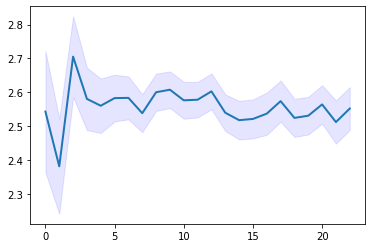

In [92]:
under_line     = np.array(quality_mean) - 1.96 * np.array(quality_se)
over_line      = np.array(quality_mean) + 1.96 * np.array(quality_se)
plt.plot(time, quality_mean, linewidth=2) #mean curve.
plt.fill_between(time, under_line, over_line, color='b', alpha=.1) #std curves.